<a href="https://colab.research.google.com/github/shub0411/Book_Recommendation_System/blob/main/Book_Recommedation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
df_books = pd.read_csv('/content/drive/MyDrive/capstone 4/Books.csv',  error_bad_lines=False, encoding='ISO-8859-1', warn_bad_lines=False)

In [232]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [233]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [234]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [235]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [236]:
df_books.shape

(271360, 8)

In [237]:
df_books.isna().sum()
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [238]:
df_ratings = pd.read_csv('/content/drive/MyDrive/capstone 4/Ratings.csv', encoding ='latin')

In [239]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [240]:
df_user = pd.read_csv('/content/drive/MyDrive/capstone 4/Users.csv', encoding ='latin')

In [241]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [242]:
df_user.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [243]:
df_user.shape

(278858, 3)

In [244]:
ratings_with_name = df_ratings.merge(df_books,on='ISBN')

In [245]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.LZZZZZZZ.jpg
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.LZZZZZZZ.jpg
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.LZZZZZZZ.jpg


In [246]:
df_books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis= 1, inplace= True)
df_books.columns= df_books.columns.str.strip().str.lower().str.replace('-', '_')
df_user.columns= df_user.columns.str.strip().str.lower().str.replace('-', '_')
df_ratings.columns= df_ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [247]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [248]:
pd.set_option('display.max_colwidth', -1)

In [249]:
print(df_books.dtypes)
print('-'*40)
print(df_books.isnull().sum())

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object
----------------------------------------
isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


In [250]:
df_books.loc[(df_books['book_author'].isnull()),:]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [251]:
df_books.loc[(df_books['isbn'] == '9627982032'),'book_author'] = 'Other'

In [252]:
df_books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see there are three string values in the 'year_of_publication' column. Let's check at the corresponding rows in the dataframe.

In [253]:
df_books[df_books['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [254]:
df_books[df_books['year_of_publication'] == 'Gallimard'] 

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


Persumably there has been a shift in the values of this three rows. Let's bring them in the right place.

In [255]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [256]:
replace_df_value(df_books, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(df_books, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(df_books, 209538, 'year_of_publication', 2000)
replace_df_value(df_books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(df_books, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(df_books, 221678, 'book_author', 'James Buckley')
replace_df_value(df_books, 221678, 'year_of_publication', 2000)
replace_df_value(df_books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(df_books, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(df_books, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(df_books, 220731, 'year_of_publication', 2003)
replace_df_value(df_books, 220731, 'publisher', 'Gallimard')


,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Let's check if the corrections are made properly.

In [257]:
df_books.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

In [258]:
df_books.loc[209538]

isbn                   078946697X                                                                    
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [259]:
df_books.loc[df_books['isbn'].str.endswith('X')].head()

,isbn,book_title,book_author,year_of_publication,publisher
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
11,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press
40,038078243X,Miss Zukas and the Raven's Dance,Jo Dereske,1996,Avon
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam
42,067176537X,The Therapeutic Touch: How to Use Your Hands to Help or to Heal,Dolores Krieger,1979,Fireside


In [260]:
#Titles with more than 1, ISBN code
df_books[df_books['book_title'] == "Where You'll Find Me: And Other Stories"]

,isbn,book_title,book_author,year_of_publication,publisher
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
213486,0684815109,Where You'll Find Me: And Other Stories,Ann Beattie,1996,Scribner Book Company


In [261]:
df_books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              2
dtype: int64

So the corrections are made. We've seen there are two missing values in the 'publisher' column. Let's take care of that

In [262]:
df_books.loc[(df_books['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [263]:
df_books.loc[(df_books['isbn'] == '193169656X'),'publisher'] = 'No Mention'
df_books.loc[(df_books['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [264]:
df_books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [265]:
## Converting year of publication in Numbers
df_books['year_of_publication'] = df_books['year_of_publication'].astype(int)

In [266]:
print(sorted(list(df_books['year_of_publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [267]:
## Replacing Invalid years with max year
count = Counter(df_books['year_of_publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

Counter is a subclass of dict that's specially designed for counting hashable objects in Python.

In [268]:
df_books.loc[df_books['year_of_publication'] > 2021, 'year_of_publication'] = 2002
df_books.loc[df_books['year_of_publication'] == 0, 'year_of_publication'] = 2002

In [269]:
## Uppercasing all alphabets in ISBN
df_books['isbn'] = df_books['isbn'].str.upper()

In [270]:
## Drop duplicate rows
df_books.drop_duplicates(keep='last', inplace=True) 
df_books.reset_index(drop = True, inplace = True)

In [271]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271047 non-null  object
 1   book_title           271047 non-null  object
 2   book_author          271047 non-null  object
 3   year_of_publication  271047 non-null  int64 
 4   publisher            271047 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


# **For Users Dataset** 

In [272]:
print("Columns: ", list(df_user.columns))
df_user.head()

Columns:  ['user_id', 'location', 'age']


,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [273]:
## Checking null values
print(df_user.isna().sum())    

user_id     0     
location    0     
age         110762
dtype: int64


In [274]:
## Check for all values present in Age column
print(list(sorted(df_user['age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

By keeping the valid age range of readers as 10 to 80 replace null values and invalid ages in the Age column with the mean of valid ages.

In [275]:
required = df_user[df_user['age'] <= 80]
required = required[required['age'] >= 10]

In [276]:
mean = round(required['age'].mean())   
mean

35

In [277]:
df_user.loc[df_user['age'] > 80, 'age'] = mean    #outliers with age grater than 80 are substituted with mean 
df_user.loc[df_user['age'] < 10, 'age'] = mean    #outliers with age less than 10 years are substitued with mean
df_user['age'] = df_user['age'].fillna(mean)      #filling null values with mean
df_user['age'] = df_user['age'].astype(int)       #changing Datatype to int

The location column has 3 values city, state, and country. These are split into 3 different columns named; City, State, and Country respectively. In the case of null value, ‘other’ has been assigned as the entity value.

In [278]:
list_ = df_user.location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
df_user = df_user.drop('location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['city'])
df_state = pd.DataFrame(state,columns=['state'])
df_country = pd.DataFrame(country,columns=['country'])

df_user = pd.concat([df_user, df_city], axis=1)
df_user = pd.concat([df_user, df_state], axis=1)
df_user = pd.concat([df_user, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [279]:
## Drop duplicate rows
df_user.drop_duplicates(keep='last', inplace=True)
df_user.reset_index(drop=True, inplace=True)

In [280]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  278858 non-null  int64 
 1   age      278858 non-null  int64 
 2   city     278858 non-null  object
 3   state    278858 non-null  object
 4   country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [281]:
df_user.head()

,user_id,age,city,state,country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


# **For Rating Dataset**

In [283]:
print("Columns: ", list(df_ratings.columns))
df_ratings.head()

Columns:  ['user_id', 'isbn', 'book_rating']


,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [284]:
## Checking for null values
df_ratings.isnull().sum() 

user_id        0
isbn           0
book_rating    0
dtype: int64

In [286]:
## checking all ratings number or not
print(is_numeric_dtype(df_ratings['book_rating']))

True


In [287]:
## checking User-ID contains only number or not
print(is_numeric_dtype(df_ratings['user_id']))

True


In [289]:
## checking ISBN
flag = 0
k =[]
reg = "[^A-Za-z0-9]"

for x in df_ratings['isbn']:
    z = re.search(reg,x)    
    if z:
        flag = 1

if flag == 1:
    print("False")
else:
    print("True")

False


In [290]:
## removing extra characters from ISBN (from ratings dataset) existing in books dataset
bookISBN = df_books['isbn'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in df_ratings.iterrows():
    z = re.search(reg, row_Value['isbn'])    
    if z:
        f = re.sub(reg,"",row_Value['isbn'])
        if f in bookISBN:
            df_ratings.at[index , 'isbn'] = f

In [291]:
## Uppercasing all alphabets in ISBN
df_ratings['isbn'] = df_ratings['isbn'].str.upper()


In [292]:
## Drop duplicate rows
df_ratings.drop_duplicates(keep='last', inplace=True)
df_ratings.reset_index(drop=True, inplace=True)

In [293]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149776 non-null  int64 
 1   isbn         1149776 non-null  object
 2   book_rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [295]:
df_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# **Merging of all three Tables**

**Merging Books, Users and Rating Tables in One**

In [296]:
dataset = pd.merge(df_books, df_ratings, on='isbn', how='inner')
dataset = pd.merge(dataset, df_user, on='user_id', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031609 entries, 0 to 1031608
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   isbn                 1031609 non-null  object
 1   book_title           1031609 non-null  object
 2   book_author          1031609 non-null  object
 3   year_of_publication  1031609 non-null  int64 
 4   publisher            1031609 non-null  object
 5   user_id              1031609 non-null  int64 
 6   book_rating          1031609 non-null  int64 
 7   age                  1031609 non-null  int64 
 8   city                 1031609 non-null  object
 9   state                1031609 non-null  object
 10  country              1031609 non-null  object
dtypes: int64(4), object(7)
memory usage: 94.4+ MB


Divide complete data on the basis of Implicit and Explicit ratings datasets

In [297]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['book_rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(384074, 11)

In [298]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['book_rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(647535, 11)

In [299]:
dataset1.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35,timmins,ontario,canada


# **Data Visualization**

Text(0.5, 1.0, 'No of books by an author (Top 15)')

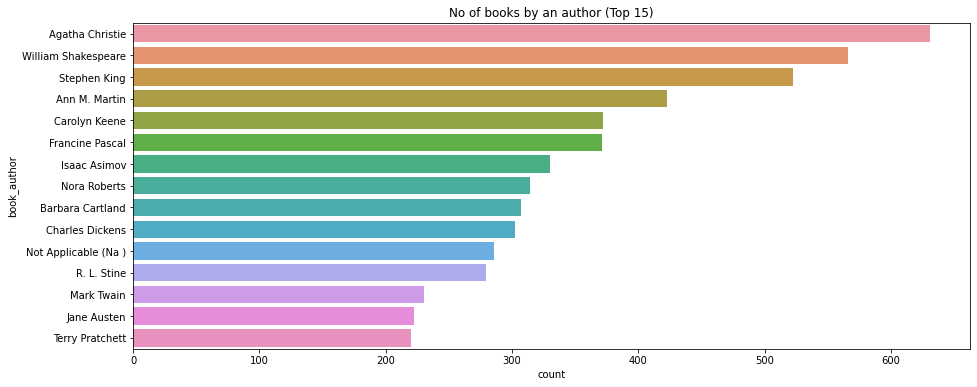

In [301]:
plt.figure(figsize=(15,6))
sns.countplot(y="book_author", data=df_books,order=df_books['book_author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

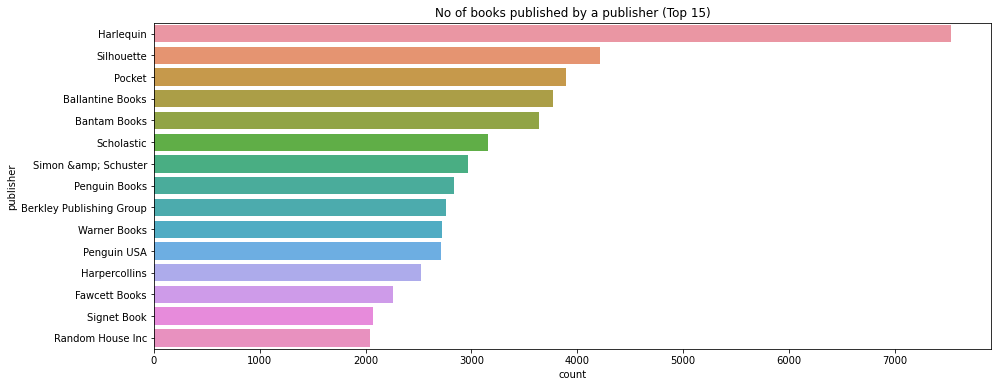

In [303]:
plt.figure(figsize=(15,6))
sns.countplot(y="publisher", data=df_books,order=df_books['publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

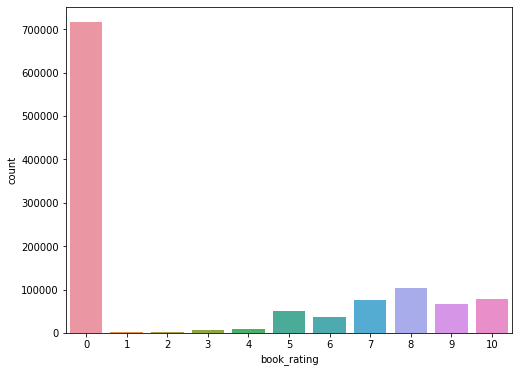

In [304]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating", data=df_ratings)

This countplot shows users have rated 0 the most, which can mean they haven't rated bokks at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

Text(0.5, 1.0, 'Explicit Ratings')

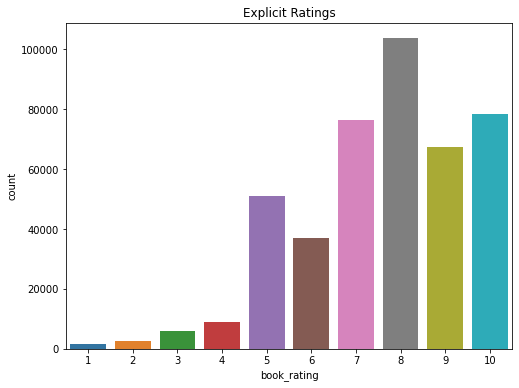

In [305]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = df_ratings[df_ratings['book_rating'] != 0]
sns.countplot(x="book_rating", data=data)
plt.title("Explicit Ratings")